In [1]:
import numpy as np
from utils import * 
from constant import *
from datetime import date
import matplotlib.pyplot as plt

In [2]:
def init_matrix():
    Res = np.zeros((N_VARIABLE,T_MAX))
    Res[0,0] = S_0
    return Res
Res = init_matrix()

In [3]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,cst):
    
    S_1 = S-cst['tau'][i]*S*I_moins*deltaT
    I_moins_1 = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
    I_plus_1 = I_plus +(cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_plus)*deltaT
    R_moins_1 = R_moins +(cst['gamma_IR']*I_moins-cst['lambda_2']*R_moins)*deltaT
    R_plus_I_1 = R_plus_I + (cst['gamma_IR']*I_plus+cst['lambda_2']*R_moins)*deltaT
    H_1 = H + (cst['gamma_IH']*(I_moins + I_plus)-(cst['gamma_HR']+cst['gamma_HD']+cst['gamma_HU'])*H)*deltaT
    U_1 = U + (cst['gamma_IU']*(I_moins + I_plus)+cst['gamma_HU']*H-(cst['gamma_UR'] + cst['gamma_UD'])*U)*deltaT
    R_plus_H_1 = R_plus_H+ (cst['gamma_HR']*H+cst['gamma_UR']*U)*deltaT
    D_1 = D + (cst['gamma_UD']*U+cst['gamma_HD']*H)*deltaT  
    D_R_1 = D_R +((cst['lambda_1']+cst['gamma_IH']+cst['gamma_IU'])*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def Resolution_Systeme(set_size,deltaT,S_0,cst):
    Res = np.zeros((N_VARIABLE,set_size))
    
    Res[0,0] = cst['S_0'] 
    Res[1,0] = cst['I_moins_0']
    
    for i in range(1,set_size):
        Res[:,i] = euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i-1,cst)
    return(Res)


In [4]:
cst = init_constant()
print(cst['t_0'])
print(cst['N'])




21
33


26 30


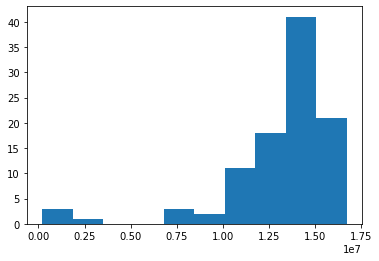

In [71]:

def pic_epidemie(L,cst):
    #### L une liste 
    try :
        maximum = np.max(L)
        N_jours_pic = L.index(maximum)
    except : 
        print(L)
        print(cst)
    return (maximum, N_jours_pic)
### MC ####
MAX = []
N_MAX = []
for i in range(100):
    cst = init_constant()
    Resultat = Resolution_Systeme(set_size,deltaT,S_0,cst)
    max_patients, N_jours_max = pic_epidemie(list(Resultat[6]),cst)
    MAX.append(max_patients)
    N_MAX.append([N_jours_max])
plt.hist(MAX)
#plt.plot(N_MAX)


    
    
    


In [24]:
print(cst['t_0'],cst['N'])

16 39


In [12]:
init_constant()

{'S_0': 67000000,
 'p_a': 0.48308793015432366,
 'p_IH': 0.15592626164395912,
 'p_IU': 0.029027954038217736,
 'p_HD': 0.13427125187699582,
 'p_HU': 0.18430820553126004,
 'p_UD': 0.3171138869298152,
 'R_0': 3.3954111318743814,
 'mu': 0.048356876107699245,
 'lambda_1': 0.0005451858507615541,
 't_0': 36,
 'N': 12,
 'N_I': 9,
 'N_H': 16,
 'N_U': 13,
 'I_moins_0': 76,
 'lambda_2': 0,
 'gamma_IR': 0.12103879435857991,
 'gamma_IH': 0.10274154500063536,
 'gamma_IU': 0.10955299397411805,
 'gamma_HD': 0.008391953242312239,
 'gamma_HU': 0.011519262845703752,
 'gamma_HR': 0.04258878391198401,
 'gamma_UD': 0.02439337591767809,
 'gamma_UR': 0.05252970100539884,
 'tau_0': 1.6920221503453878e-08,
 't': array([ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  

In [8]:
t

array([ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136])